In [1]:
import pandas as pd
from lightweight_mmm import lightweight_mmm
from lightweight_mmm import plot
from lightweight_mmm import preprocessing
from lightweight_mmm import optimize_media
from lightweight_mmm import utils
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels as sm
import jax.numpy as jnp

In [2]:
df = pd.read_csv("/Users/maxwellkreitman/Desktop/Launchpad/MMM/marketing_spend_and_revenue_data - marketing_spend_and_revenue_data.csv")
df

Date       Revenue  Google Performance Max  Google Search Brand  \
0    2022-01-01   5796.714153              565.844985           322.220135   
1    2022-01-02   5165.863043              458.498491           232.034662   
2    2022-01-03   6965.648769              673.987247           351.658849   
3    2022-01-04   5710.922590              600.195659           253.768143   
4    2022-01-05   4371.813951              456.867519           255.514027   
..          ...           ...                     ...                  ...   
360  2022-12-27  11281.891090             1176.279919           553.968343   
361  2022-12-28   8777.025075              799.572837           387.601638   
362  2022-12-29  11596.063060             1048.890624           561.527856   
363  2022-12-30  10991.349240              993.005571           547.294213   
364  2022-12-31   9109.778075              926.753951           400.620488   

     Google Search No Brand  Facebook Conversions  Facebook Others  \
0               1362.108867            163.379921       152.275251   
1               1217.779342            240.671009       572.280788   
2               1723.328306            777.660821       646.790367   
3                688.169972            580.639485       545.659219   
4                835.129990            332.607431       449.809561   
..                      ...                   ...              ...   
360             1521.575881            398.380271       420.361996   
361              606.131492            454.876486       726.471875   
362              746.965853            208.343675       448.126518   
363             1412.349163            505.340222       245.525098   
364             1621.342741            182.243840       956.856202   

     Facebook Product Catalog Sales  Influencers  Display Ads       TV Ads  \
0                        585.579521   486.459433  1326.028990  1702.230023   
1                        367.558630   181.465092   761.528524  1082.458280   
2                        443.272047   413.778807   421.681361   630.103186   
3                        375.149632   190.269984   244.705077  2318.640804   
4                        363.454579   294.213237   552.753741  2157.475018   
..                              ...          ...          ...          ...   
360                      860.287524   109.520922   393.058816  1692.934151   
361                      796.827911   410.422425   671.252580  2147.995304   
362                      915.581107   459.871819   304.755056   794.326502   
363                      917.141306   448.015427  1455.582016   911.588754   
364                      610.628252   165.678212  1159.306100  1694.858485   

      Radio Ads  Magazine Ads  Covid  
0    166.876823    599.465584      1  
1    127.253406    319.817106      1  
2    192.637981    282.768261      1  
3    166.475016    412.040813      1  
4    127.684970    184.554535      1  
..          ...           ...    ...  
360  369.539362    218.012918      0  
361  313.527800    208.095189      0  
362  306.008216    103.628226      0  
363  323.336313    432.395953      0  
364  251.112200    379.021800      0  

[365 rows x 14 columns]

## Plotting data

In [3]:
#dropping Covid column
df.drop('Covid', axis=1, inplace=True)
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# creating list of features without Date 
features = [col for col in df.columns if col != 'Date']
features

['Revenue',
 'Google Performance Max',
 'Google Search Brand',
 'Google Search No Brand',
 'Facebook Conversions',
 'Facebook Others',
 'Facebook Product Catalog Sales',
 'Influencers',
 'Display Ads',
 'TV Ads',
 'Radio Ads',
 'Magazine Ads']

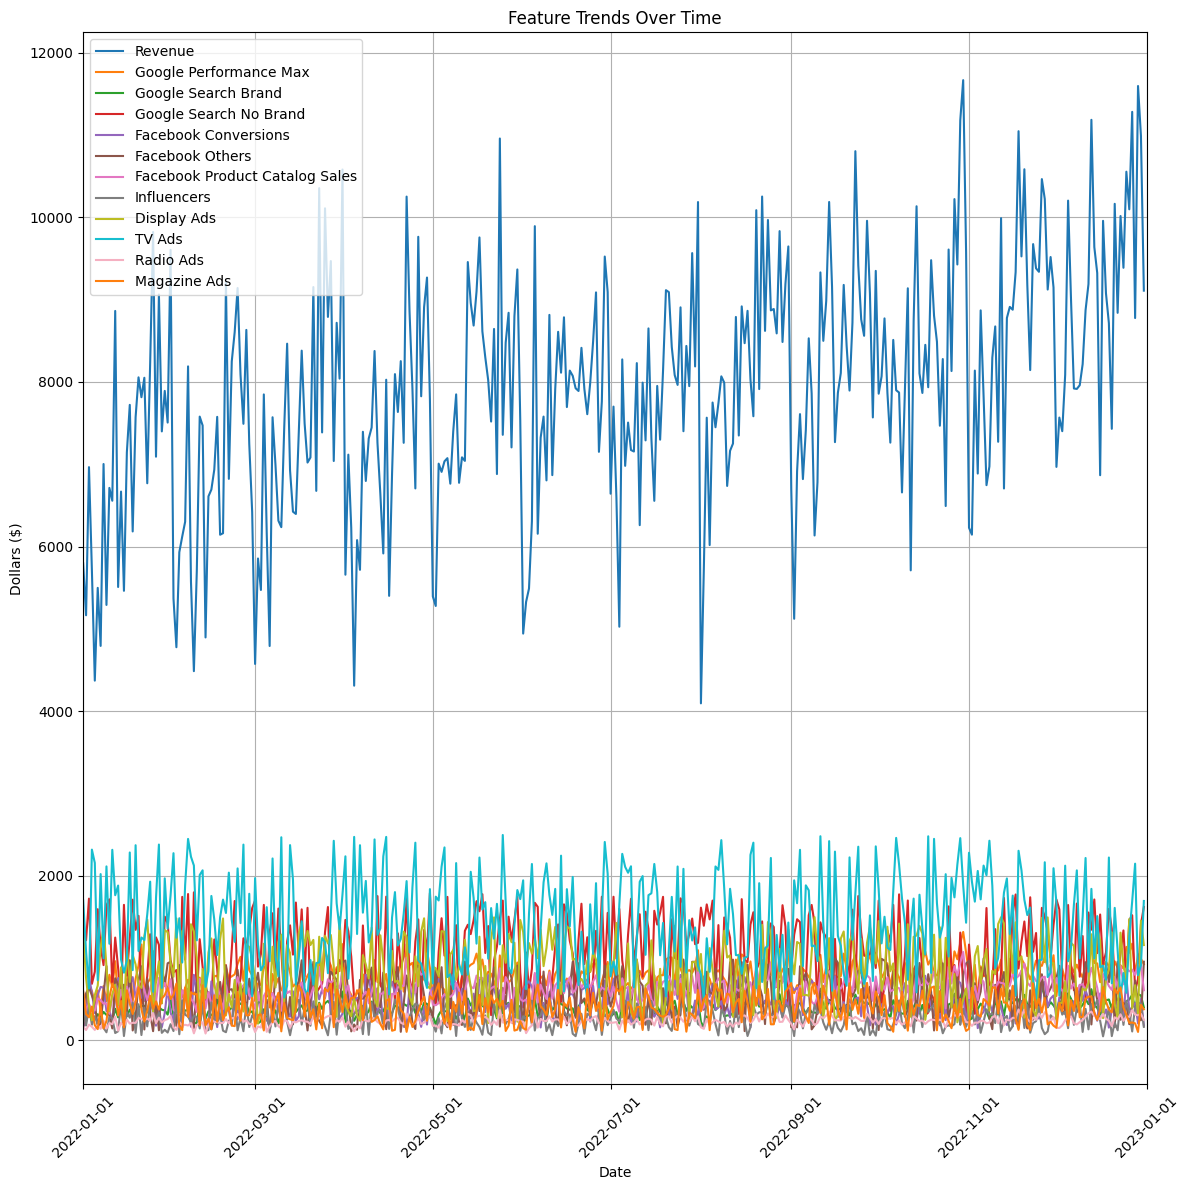

In [5]:

# Defining a list of 12 distinct colors
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
    '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#f5b0c1', '#ff7f0e'
]

plt.figure(figsize=(12, 12))

# Plot each feature with a unique color
for i, feature in enumerate(features):
    color = colors[i % len(colors)]  # Use a color from the list
    plt.plot(df['Date'], df[feature], label=feature, color=color)

# Format date
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Dollars ($)')
plt.title('Feature Trends Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2023-01-01'))
plt.tight_layout()
plt.show()


In [6]:
df.corr()

Date   Revenue  Google Performance Max  \
Date                            1.000000  0.484476                0.378713   
Revenue                         0.484476  1.000000                0.813555   
Google Performance Max          0.378713  0.813555                1.000000   
Google Search Brand             0.377806  0.815666                0.645821   
Google Search No Brand          0.015003  0.070942                0.051484   
Facebook Conversions           -0.088550 -0.086756               -0.056143   
Facebook Others                 0.083714  0.064756                0.030944   
Facebook Product Catalog Sales  0.417694  0.819146                0.660501   
Influencers                     0.011942  0.014260               -0.016563   
Display Ads                    -0.005595  0.019627               -0.028660   
TV Ads                         -0.029026 -0.086229               -0.039801   
Radio Ads                       0.342863  0.821419                0.657258   
Magazine Ads                    0.024989 -0.018291               -0.019924   

                                Google Search Brand  Google Search No Brand  \
Date                                       0.377806                0.015003   
Revenue                                    0.815666                0.070942   
Google Performance Max                     0.645821                0.051484   
Google Search Brand                        1.000000                0.041301   
Google Search No Brand                     0.041301                1.000000   
Facebook Conversions                      -0.074101                0.019652   
Facebook Others                            0.049366               -0.005821   
Facebook Product Catalog Sales             0.694538                0.013699   
Influencers                               -0.000312               -0.016464   
Display Ads                               -0.004838                0.050704   
TV Ads                                    -0.048121               -0.053420   
Radio Ads                                  0.665907                0.036884   
Magazine Ads                              -0.033964               -0.049967   

                                Facebook Conversions  Facebook Others  \
Date                                       -0.088550         0.083714   
Revenue                                    -0.086756         0.064756   
Google Performance Max                     -0.056143         0.030944   
Google Search Brand                        -0.074101         0.049366   
Google Search No Brand                      0.019652        -0.005821   
Facebook Conversions                        1.000000        -0.020903   
Facebook Others                            -0.020903         1.000000   
Facebook Product Catalog Sales             -0.098682         0.053877   
Influencers                                 0.094917        -0.121570   
Display Ads                                -0.089380        -0.069813   
TV Ads                                     -0.108927         0.044432   
Radio Ads                                  -0.025727         0.026993   
Magazine Ads                                0.098756         0.025901   

                                Facebook Product Catalog Sales  Influencers  \
Date                                                  0.417694     0.011942   
Revenue                                               0.819146     0.014260   
Google Performance Max                                0.660501    -0.016563   
Google Search Brand                                   0.694538    -0.000312   
Google Search No Brand                                0.013699    -0.016464   
Facebook Conversions                                 -0.098682     0.094917   
Facebook Others                                       0.053877    -0.121570   
Facebook Product Catalog Sales                        1.000000     0.025696   
Influencers                                           0.025696     1.000000   
Display Ads            

## Exploring correlation scatter plots for marketing channels against revenue

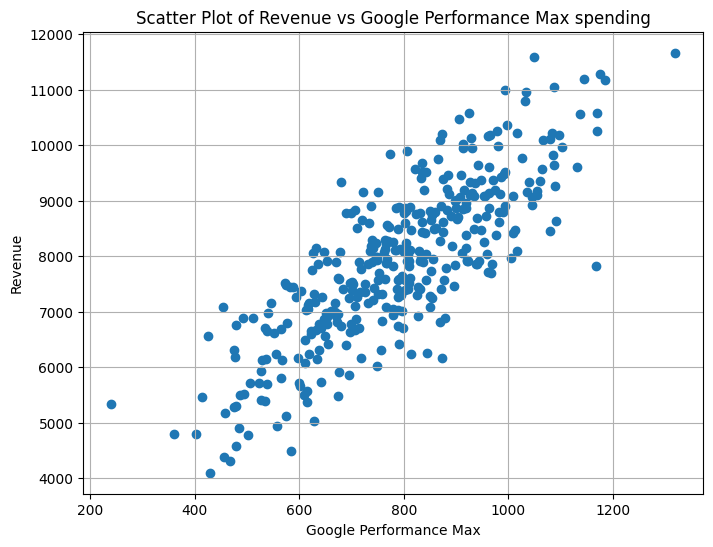

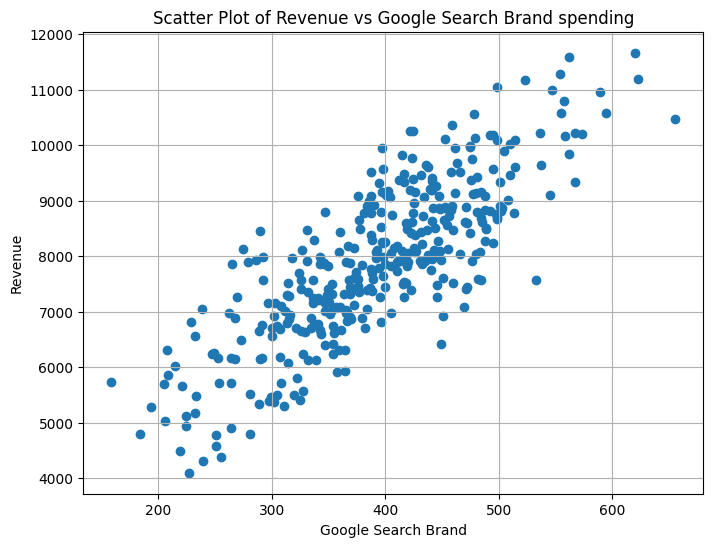

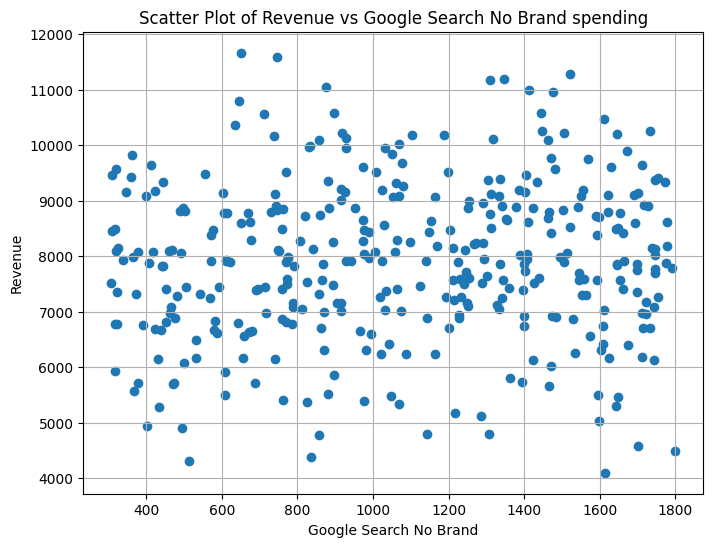

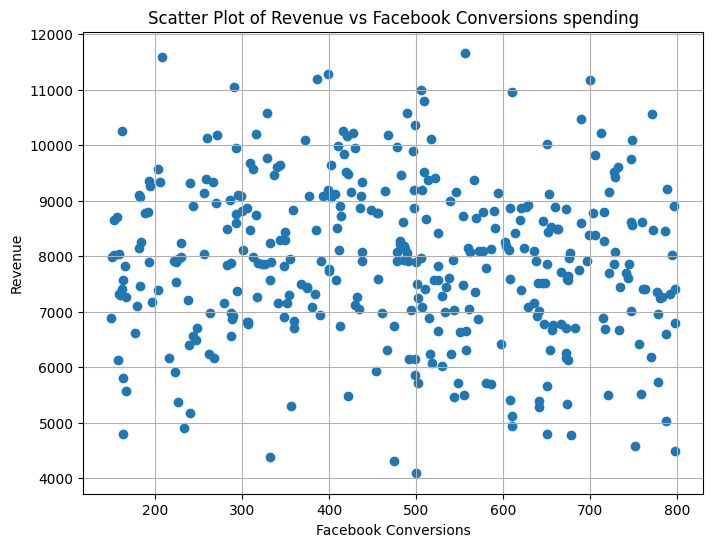

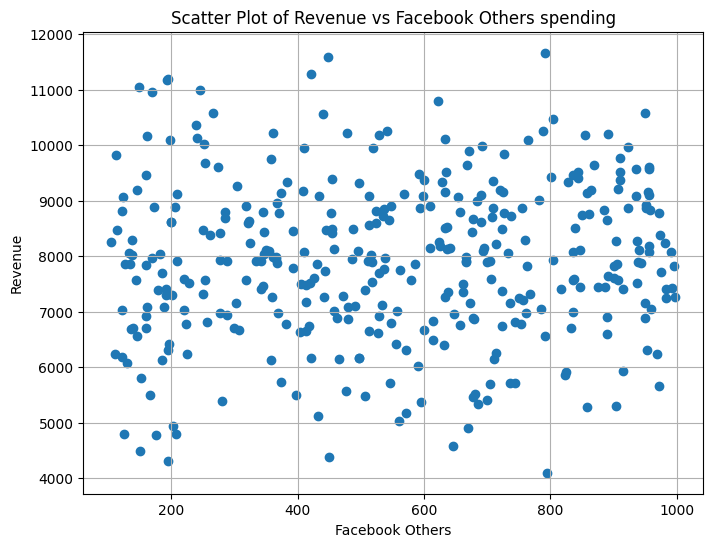

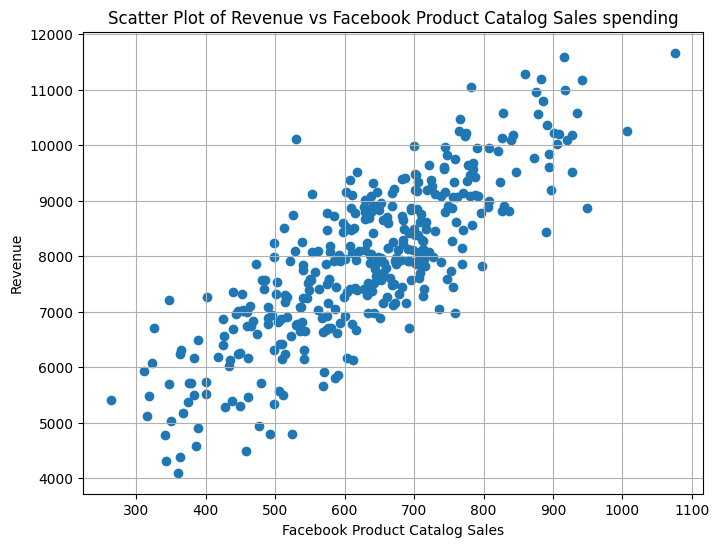

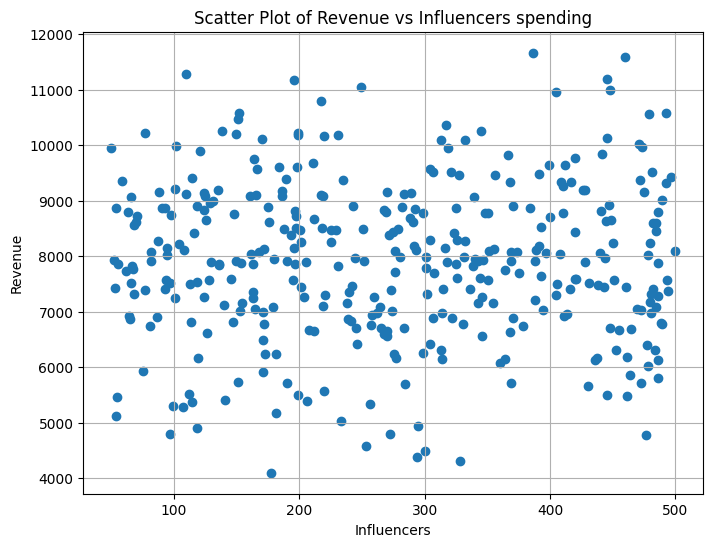

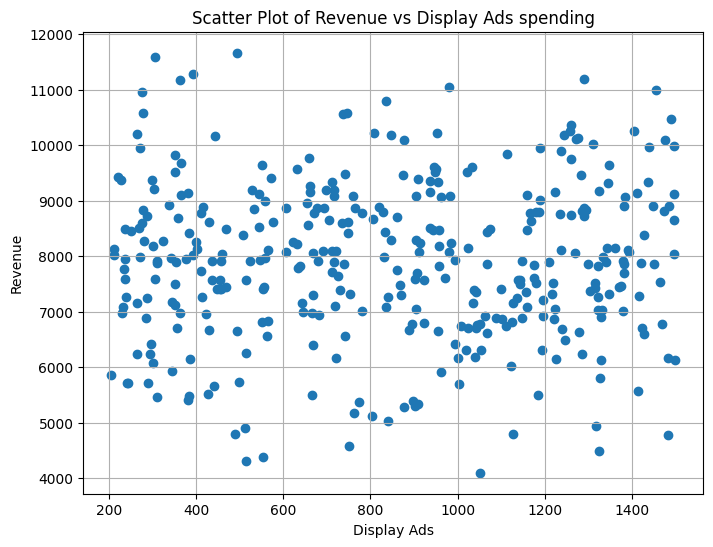

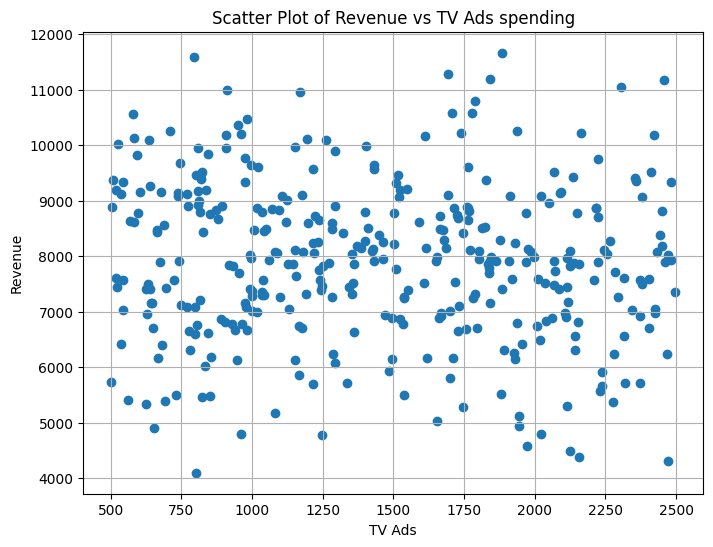

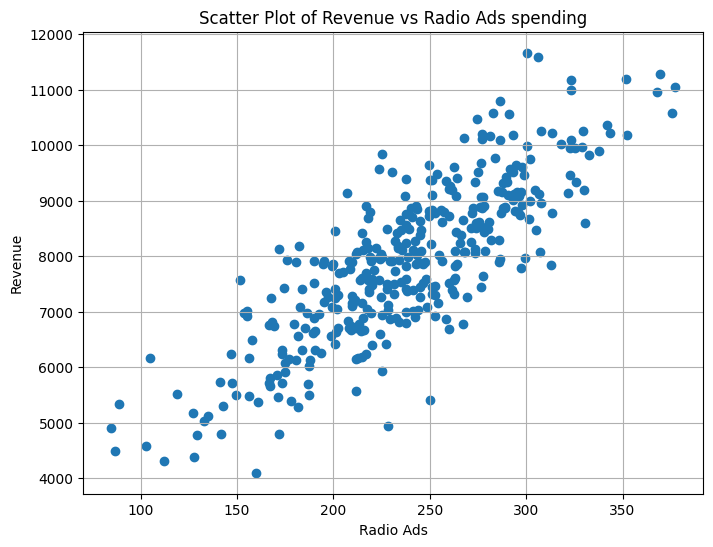

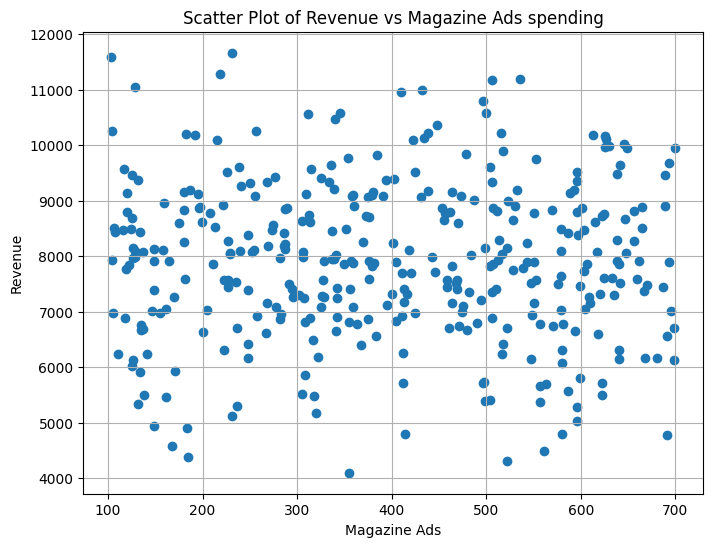

In [7]:
scatter_features = [col for col in features if col != 'Revenue']

for feature in scatter_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['Revenue'])
    plt.title(f'Scatter Plot of Revenue vs {feature} spending')
    plt.xlabel(feature)
    plt.ylabel('Revenue')
    plt.grid(True)
    plt.show()

# Preparing the data for modeling

In [8]:
df.columns

Index(['Date', 'Revenue', 'Google Performance Max', 'Google Search Brand',
       'Google Search No Brand', 'Facebook Conversions', 'Facebook Others',
       'Facebook Product Catalog Sales', 'Influencers', 'Display Ads',
       'TV Ads', 'Radio Ads', 'Magazine Ads'],
      dtype='object')

In [9]:
#subsetting dataframe for independent and dependent variables, and costs

marketing_sources = df[['Google Performance Max', 'Google Search Brand',
       'Google Search No Brand', 'Facebook Conversions', 'Facebook Others',
       'Facebook Product Catalog Sales', 'Influencers', 'Display Ads',
       'TV Ads', 'Radio Ads', 'Magazine Ads']].to_numpy()

target = df[['Revenue']].to_numpy()

costs = df[['Google Performance Max', 'Google Search Brand',
       'Google Search No Brand', 'Facebook Conversions', 'Facebook Others',
       'Facebook Product Catalog Sales', 'Influencers', 'Display Ads',
       'TV Ads', 'Radio Ads', 'Magazine Ads']].sum().to_numpy()

In [10]:
data_size = marketing_sources.shape[0]

In [11]:
 # Splitting the dataset for train/test sets
split_point = data_size - 73

marketing_train = marketing_sources[:split_point, ...] 
marketing_test = marketing_sources[split_point:, ...]

# creating target variable train set and reshaping into 1d array
target_train = target[:split_point].reshape(-1)

In [12]:
# creating scaler objects 
marketing_scaler = preprocessing.CustomScaler(divide_operation = jnp.mean)
target_scaler = preprocessing.CustomScaler(divide_operation = jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation = jnp.mean)

In [13]:
# Fitting the scalers to each training df

marketing_train = marketing_scaler.fit_transform(marketing_train)
target_train = target_scaler.fit_transform(target_train)
costs_2 = cost_scaler.fit_transform(costs)

# Training the model

In [14]:
mmm_co = lightweight_mmm.LightweightMMM(model_name="carryover")
mmm_ad = lightweight_mmm.LightweightMMM(model_name="adstock")
mmm_hill_ad = lightweight_mmm.LightweightMMM(model_name="hill_adstock")

In [15]:
number_warmup = 100
number_samples = 100

In [16]:
mmm_co.fit(
    media = marketing_train,
    media_prior = costs_2,
    target = target_train,
    number_warmup = number_warmup,
    number_samples = number_samples,
    number_chains = 1,
)

sample: 100%|█| 200/200 [01:34<00:00,  2.12it/s, 1023 steps of size 3.73e-03. ac


In [17]:
mmm_co.print_summary()


                                  mean       std    median      5.0%     95.0%     n_eff     r_hat
 ad_effect_retention_rate[0]      0.02      0.02      0.02      0.00      0.06     36.11      0.99
 ad_effect_retention_rate[1]      0.03      0.03      0.01      0.00      0.08      7.46      1.11
 ad_effect_retention_rate[2]      0.52      0.21      0.52      0.12      0.79      7.72      1.10
 ad_effect_retention_rate[3]      0.54      0.31      0.59      0.06      0.96     19.56      1.02
 ad_effect_retention_rate[4]      0.43      0.21      0.42      0.13      0.74      4.55      1.43
 ad_effect_retention_rate[5]      0.06      0.04      0.05      0.00      0.12     14.03      1.00
 ad_effect_retention_rate[6]      0.65      0.23      0.71      0.23      0.94      5.18      1.41
 ad_effect_retention_rate[7]      0.54      0.16      0.51      0.34      0.83      3.53      1.60
 ad_effect_retention_rate[8]      0.67      0.18      0.76      0.38      0.88      4.57      1.99
 ad_effec

In [18]:
mmm_ad.fit(
    media = marketing_train,
    media_prior = costs_2,
    target = target_train,
    number_warmup = number_warmup,
    number_samples = number_samples,
    number_chains = 1,
)

sample: 100%|█| 200/200 [00:15<00:00, 12.78it/s, 1023 steps of size 3.32e-03. ac


In [19]:
mmm_ad.print_summary()


                            mean       std    median      5.0%     95.0%     n_eff     r_hat
         coef_media[0]      0.24      0.03      0.24      0.19      0.27    112.06      1.00
         coef_media[1]      0.19      0.03      0.19      0.15      0.24    212.85      0.99
         coef_media[2]      0.02      0.01      0.01      0.00      0.03     56.16      0.99
         coef_media[3]      0.31      0.42      0.02      0.00      1.08      3.90      1.75
         coef_media[4]      0.02      0.01      0.01      0.00      0.03     71.55      0.99
         coef_media[5]      0.22      0.03      0.22      0.18      0.26    134.15      1.01
         coef_media[6]      0.01      0.01      0.01      0.00      0.03     36.59      1.02
         coef_media[7]      0.02      0.01      0.01      0.00      0.04     16.41      1.07
         coef_media[8]      0.01      0.01      0.01      0.00      0.03     33.37      1.00
         coef_media[9]      0.26      0.03      0.25      0.21      0

In [20]:
mmm_hill_ad.fit(
    media = marketing_train,
    media_prior = costs_2,
    target = target_train,
    number_warmup = number_warmup,
    number_samples = number_samples,
    number_chains = 1,
)

sample: 100%|█| 200/200 [00:16<00:00, 12.20it/s, 1023 steps of size 8.32e-03. ac


In [21]:
mmm_hill_ad.print_summary()


                                          mean       std    median      5.0%     95.0%     n_eff     r_hat
                       coef_media[0]      0.72      0.34      0.61      0.31      1.37     58.65      0.99
                       coef_media[1]      0.61      0.23      0.57      0.28      0.93     85.12      1.00
                       coef_media[2]      0.12      0.10      0.10      0.00      0.27     37.00      1.00
                       coef_media[3]      0.08      0.10      0.05      0.00      0.19     70.09      1.01
                       coef_media[4]      0.11      0.15      0.06      0.00      0.24     30.14      1.01
                       coef_media[5]      0.83      0.35      0.80      0.29      1.37     83.31      0.99
                       coef_media[6]      0.07      0.05      0.06      0.00      0.17     52.58      1.00
                       coef_media[7]      0.26      0.43      0.08      0.00      0.91     12.76      1.03
                       coef_media[8]

In [22]:
from lightweight_mmm import plot

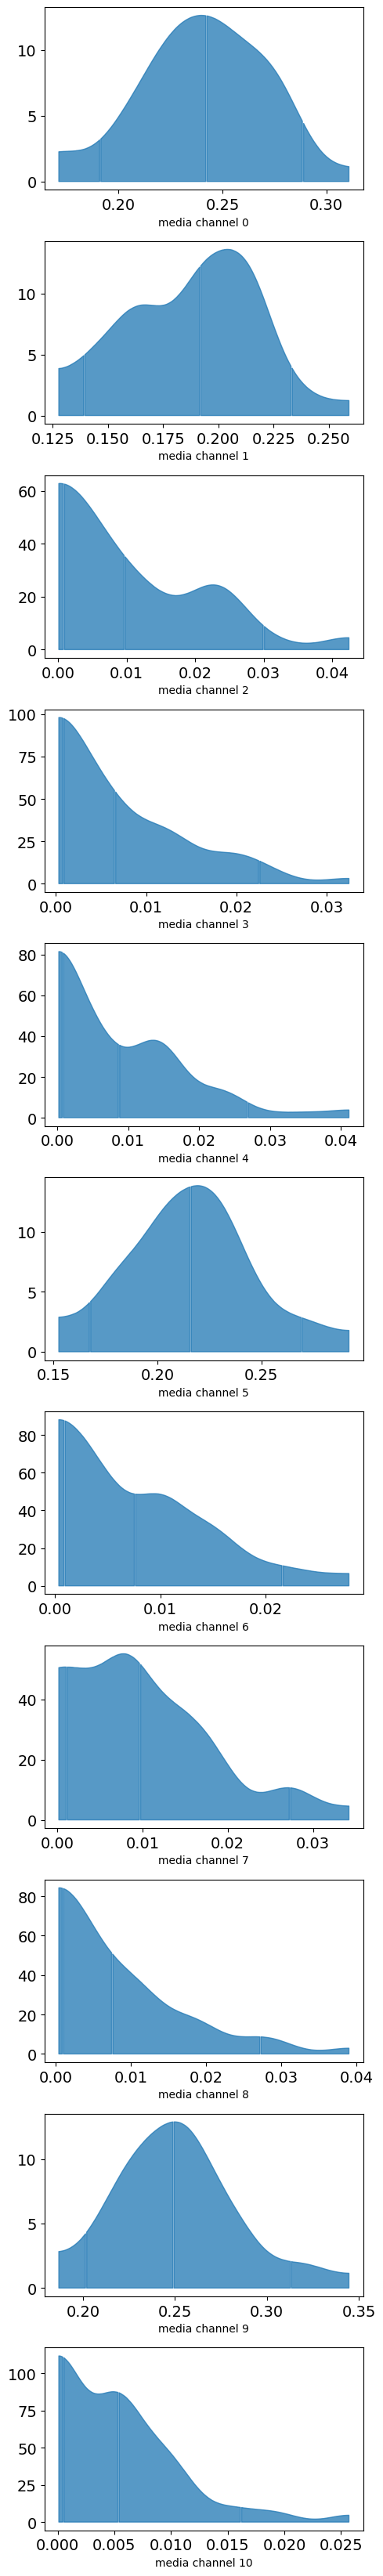

In [28]:
# model confidence for each marketing channel 
plot.plot_media_channel_posteriors(media_mix_model=mmm_co)

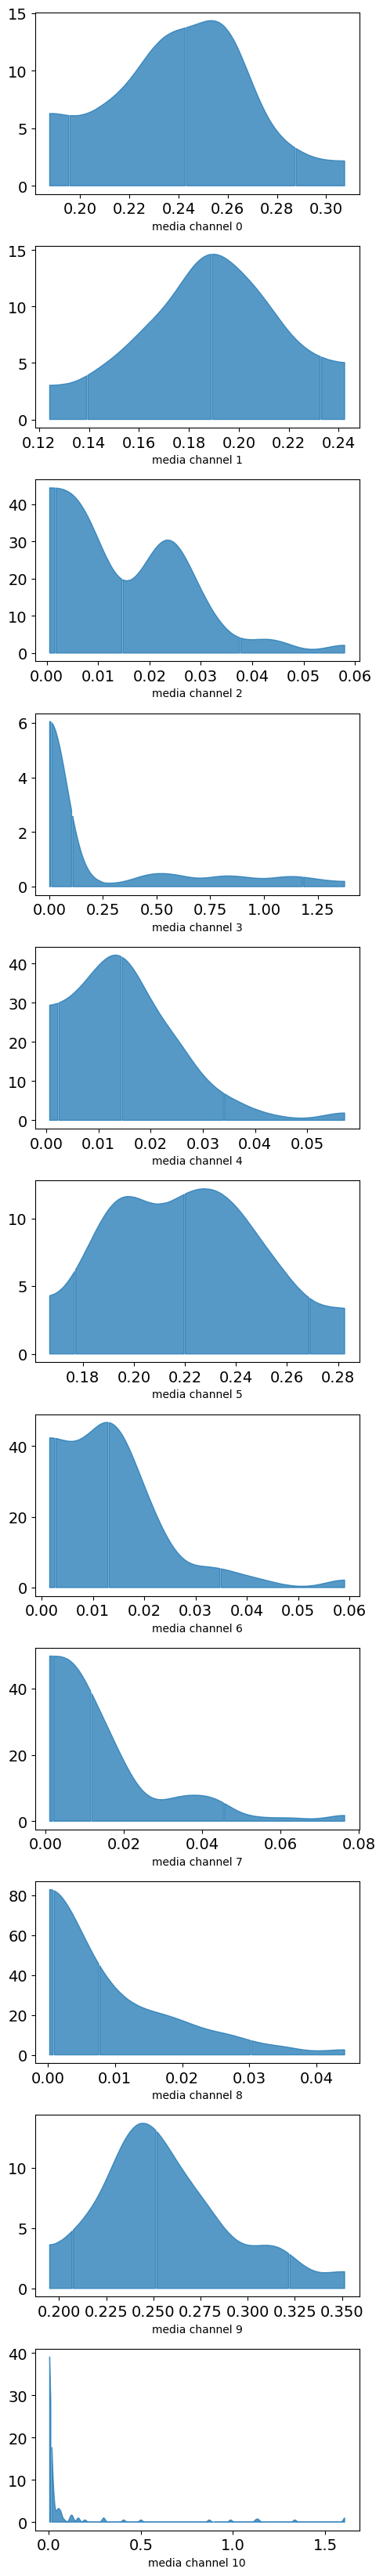

In [24]:
plot.plot_media_channel_posteriors(media_mix_model=mmm_ad)

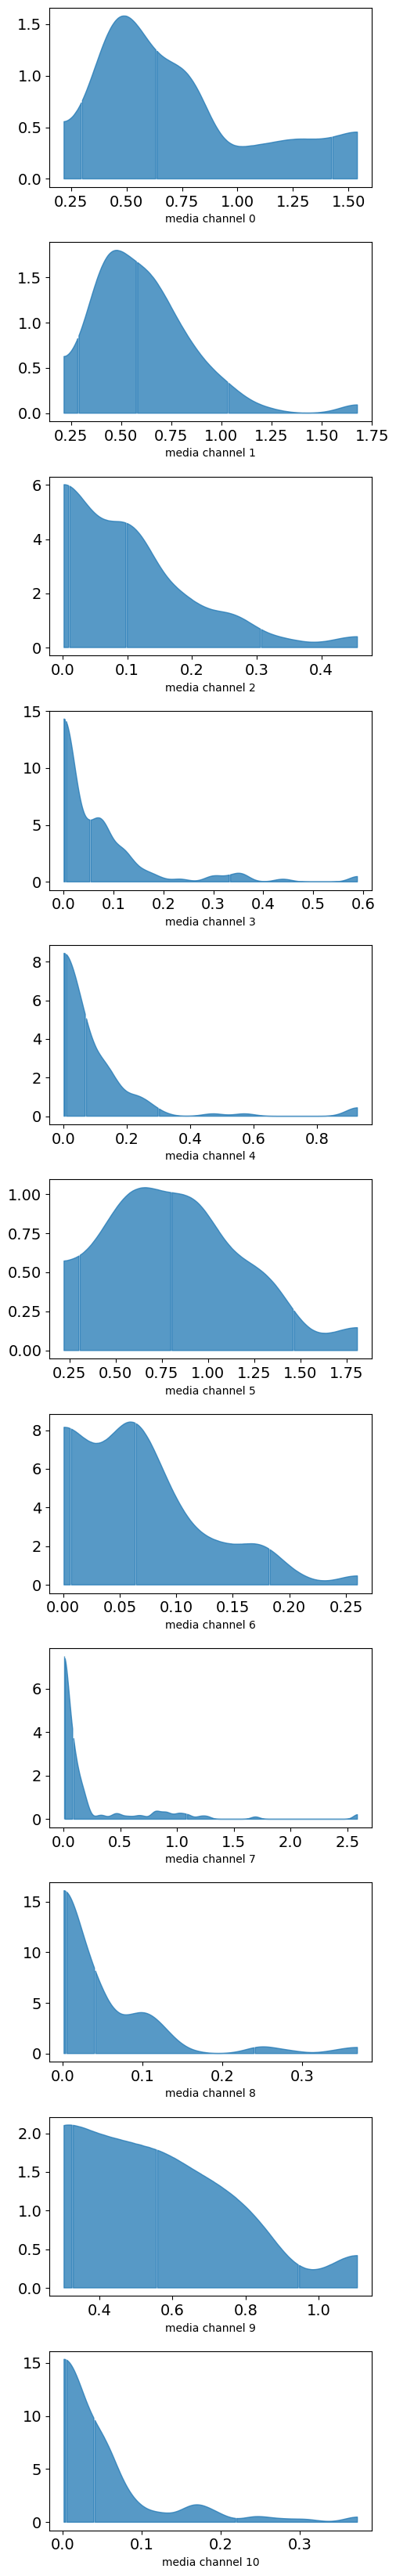

In [25]:
plot.plot_media_channel_posteriors(media_mix_model=mmm_hill_ad)

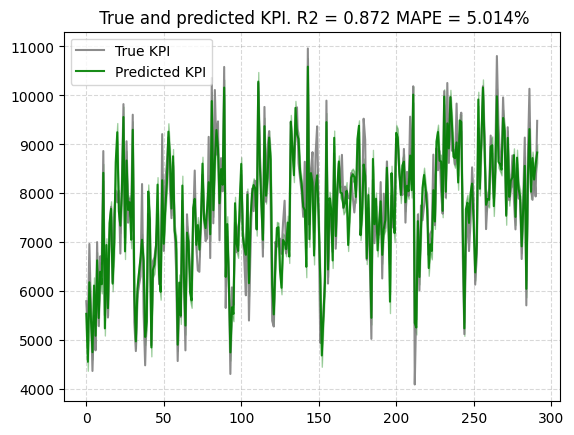

In [29]:
plot.plot_model_fit(mmm_co, target_scaler = target_scaler)

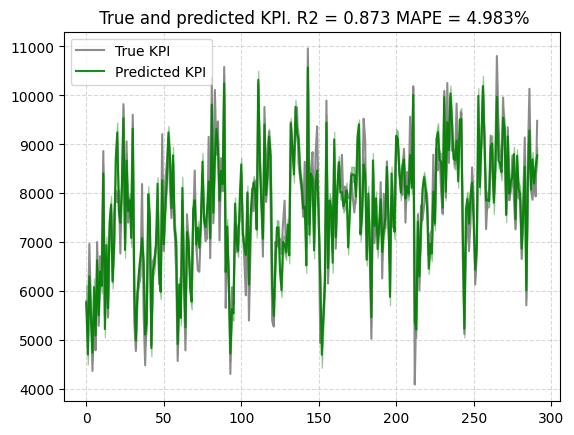

In [30]:
plot.plot_model_fit(mmm_ad, target_scaler = target_scaler)

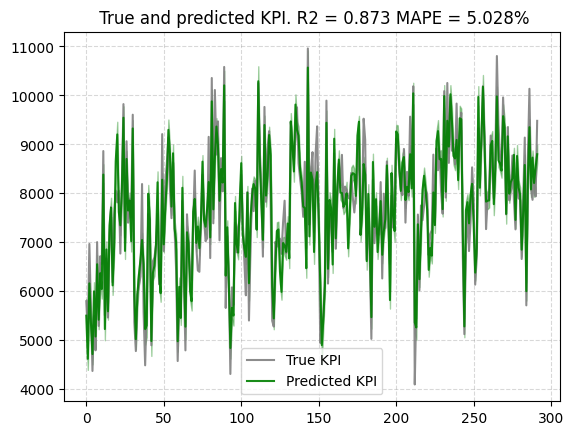

In [31]:
plot.plot_model_fit(mmm_hill_ad, target_scaler = target_scaler)

#### R^2 idealy close to 1, and Mean Absolule Percentage Error <10%

## Testing each model

In [39]:
# Scaling the marketing test data for use with the carryover model

new_predictions_co = mmm_co.predict(media = marketing_scaler.transform(marketing_test))
new_predictions_co.shape

(100, 73)

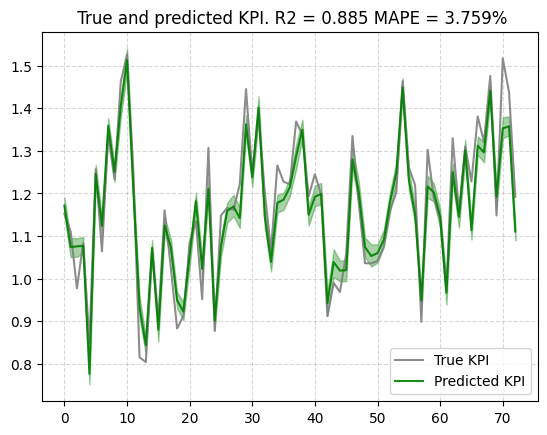

In [40]:
plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions_co, 
                                  out_of_sample_target=target_scaler.transform(target[split_point:].squeeze()))

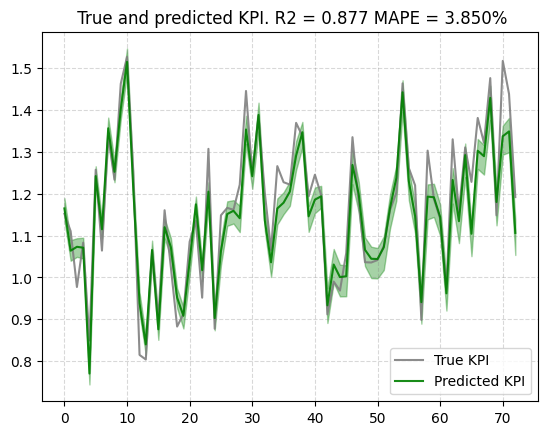

In [41]:
new_predictions_ad = mmm_ad.predict(media = marketing_scaler.transform(marketing_test))
plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions_ad, 
                                  out_of_sample_target=target_scaler.transform(target[split_point:].squeeze()))

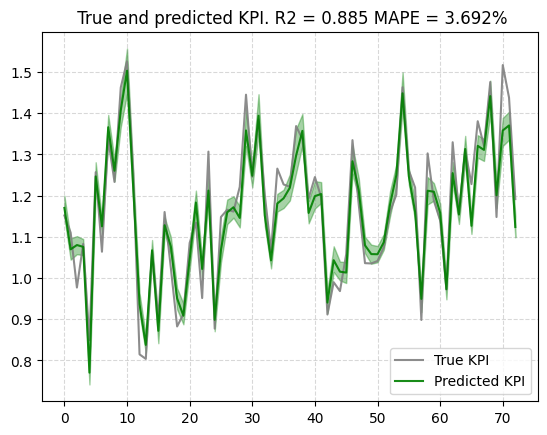

In [42]:
new_predictions_hill_ad = mmm_hill_ad.predict(media = marketing_scaler.transform(marketing_test))
plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions_hill_ad, 
                                  out_of_sample_target=target_scaler.transform(target[split_point:].squeeze()))

## Media insights for Hill-Adstock model

In [44]:
media_contribution_hill_ad, roi_hat_hill_ad = mmm_hill_ad.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)

In [45]:
import matplotlib.pyplot as plt
import numpy as np

In [49]:
def custom_plot_media_baseline_contribution_area_plot(
    media_mix_model,
    target_scaler = None,
    channel_names = None,
    fig_size = (20,7)):
    """Plots an area chart to visualize weekly media & baseline contribution.  
    Args:
        media_mix_model: Media mix model
        target_scaler: Scaler used for scaling the target
        channel_names: Names of media channels
        fig_size: Size of the figure to plot
    Returns:
        Stacked area chart of weekly baseline & media contribution.
    """

    # Creating media channels and baseline contribution dataframe
    contribution_df = plot.create_media_baseline_contribution_df(
        media_mix_model=media_mix_model,
        target_scaler=target_scaler,
        channel_names=channel_names)
    contribution_df = contribution_df.clip(0)

    #Create 
    contribution_columns = [
      col for col in contribution_df.columns if "contribution" in col  
    ]
    contribution_df_for_plot = contribution_df.loc[:, contribution_columns]
    contribution_df_for_plot = contribution_df_for_plot[
        contribution_df_for_plot.columns[::-1]]
    period = np.arange(1, contribution_df_for_plot.shape[0] + 1)
    contribution_df_for_plot.loc[:, "period"] = period

    # Plot stacked area chart
    fig, ax = plt.subplots()
    contribution_df_for_plot.plot.area(
        x="period", stacked=True, figsize=fig_size, ax=ax)
    ax.set_title("Attribution Over Time", fontsize="x-large")
    ax.tick_params(axis="y")
    ax.set_ylabel("Baseline & Media Channels Attribution")
    ax.set_xlabel("Period")
    ax.set_xlim(1, contribution_df_for_plot["period"].max())
    ax.set_xticks(contribution_df_for_plot["period"])
    ax.set_xticklabels(contribution_df_for_plot["period"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    plt.close()
    return fig

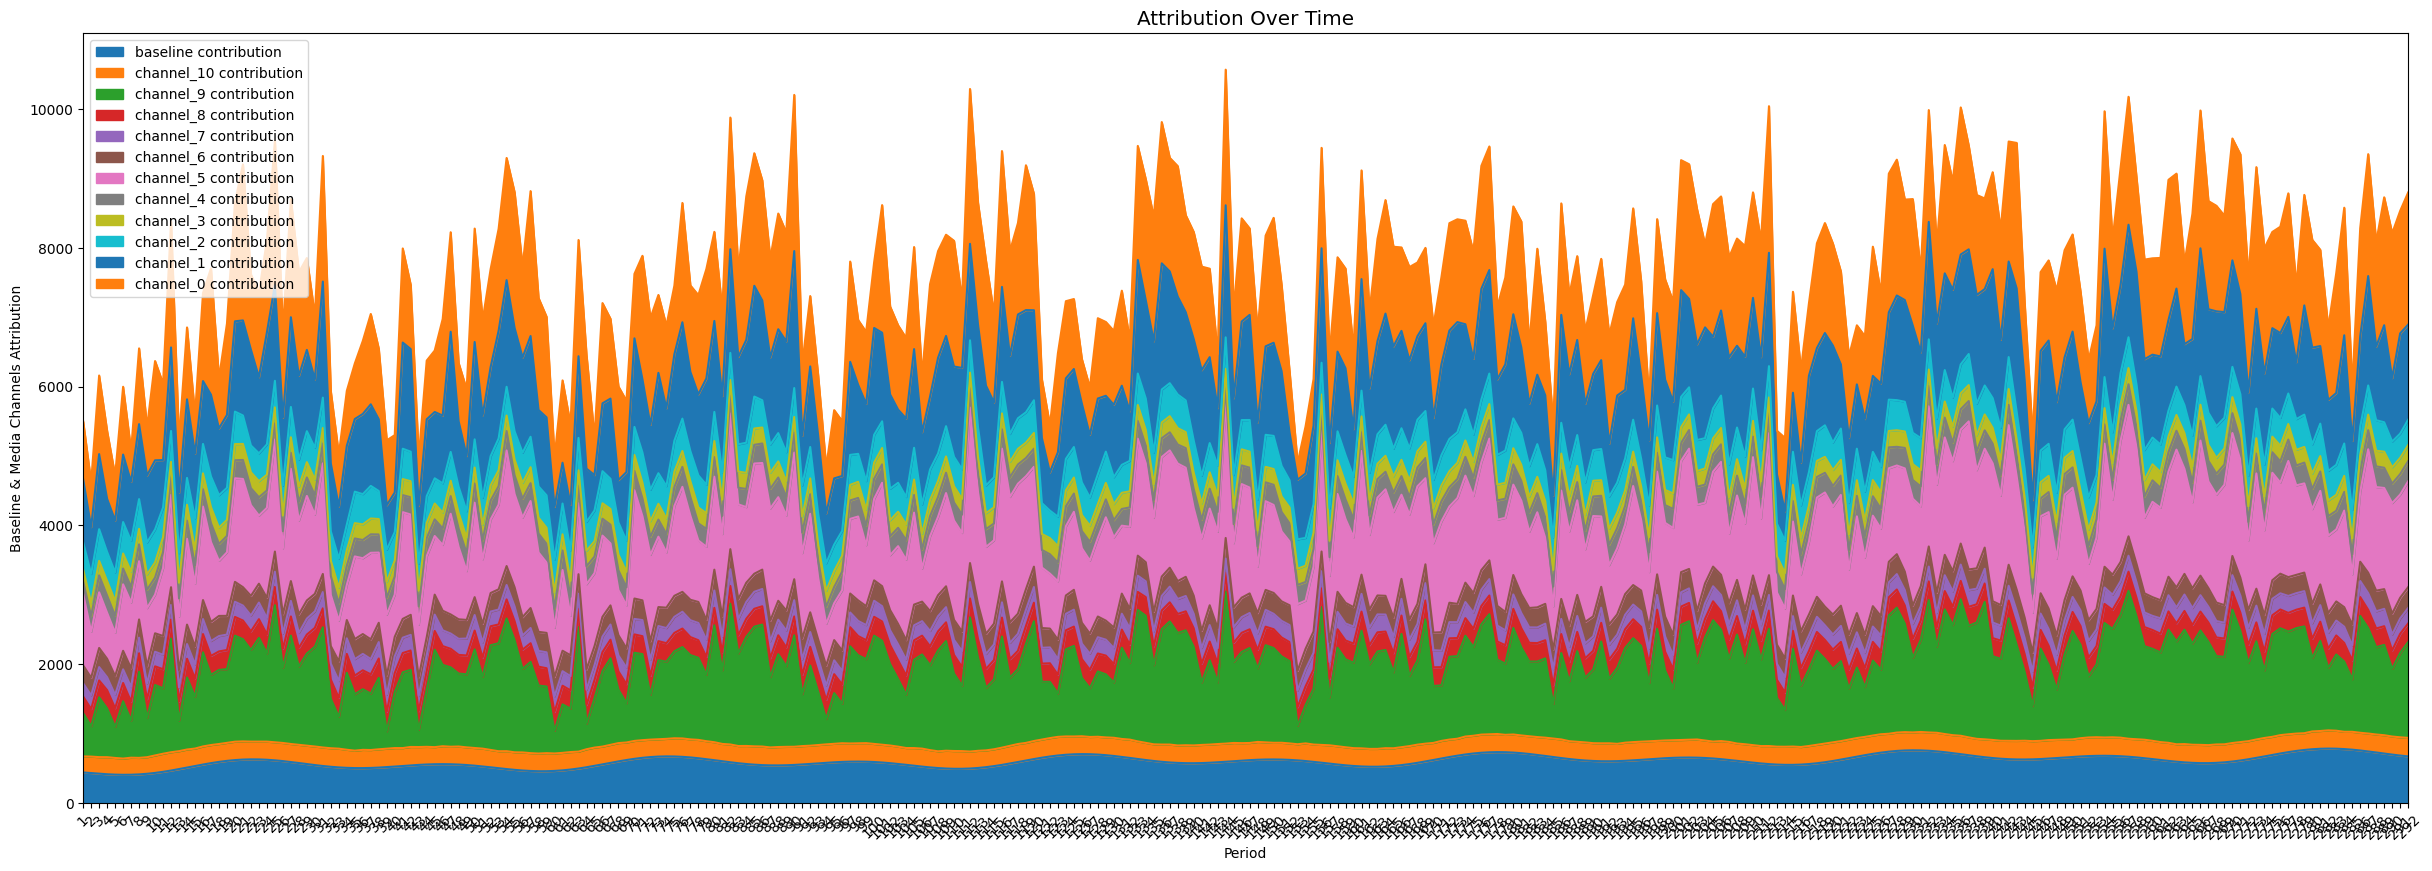

In [50]:
custom_plot_media_baseline_contribution_area_plot(media_mix_model=mmm_hill_ad,
                                                  target_scaler=target_scaler,
                                                  fig_size=(30,10))

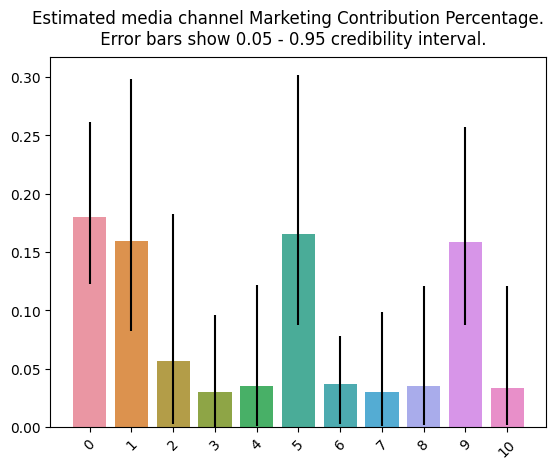

In [54]:
plot.plot_bars_media_metrics(metric=media_contribution_hill_ad, metric_name="Marketing Contribution Percentage")

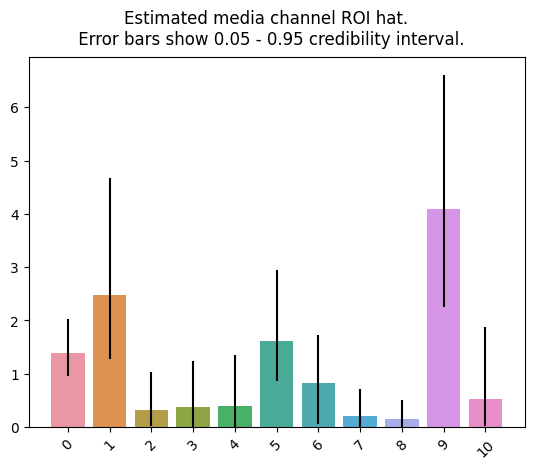

In [55]:
plot.plot_bars_media_metrics(metric=roi_hat_hill_ad, metric_name="ROI hat")

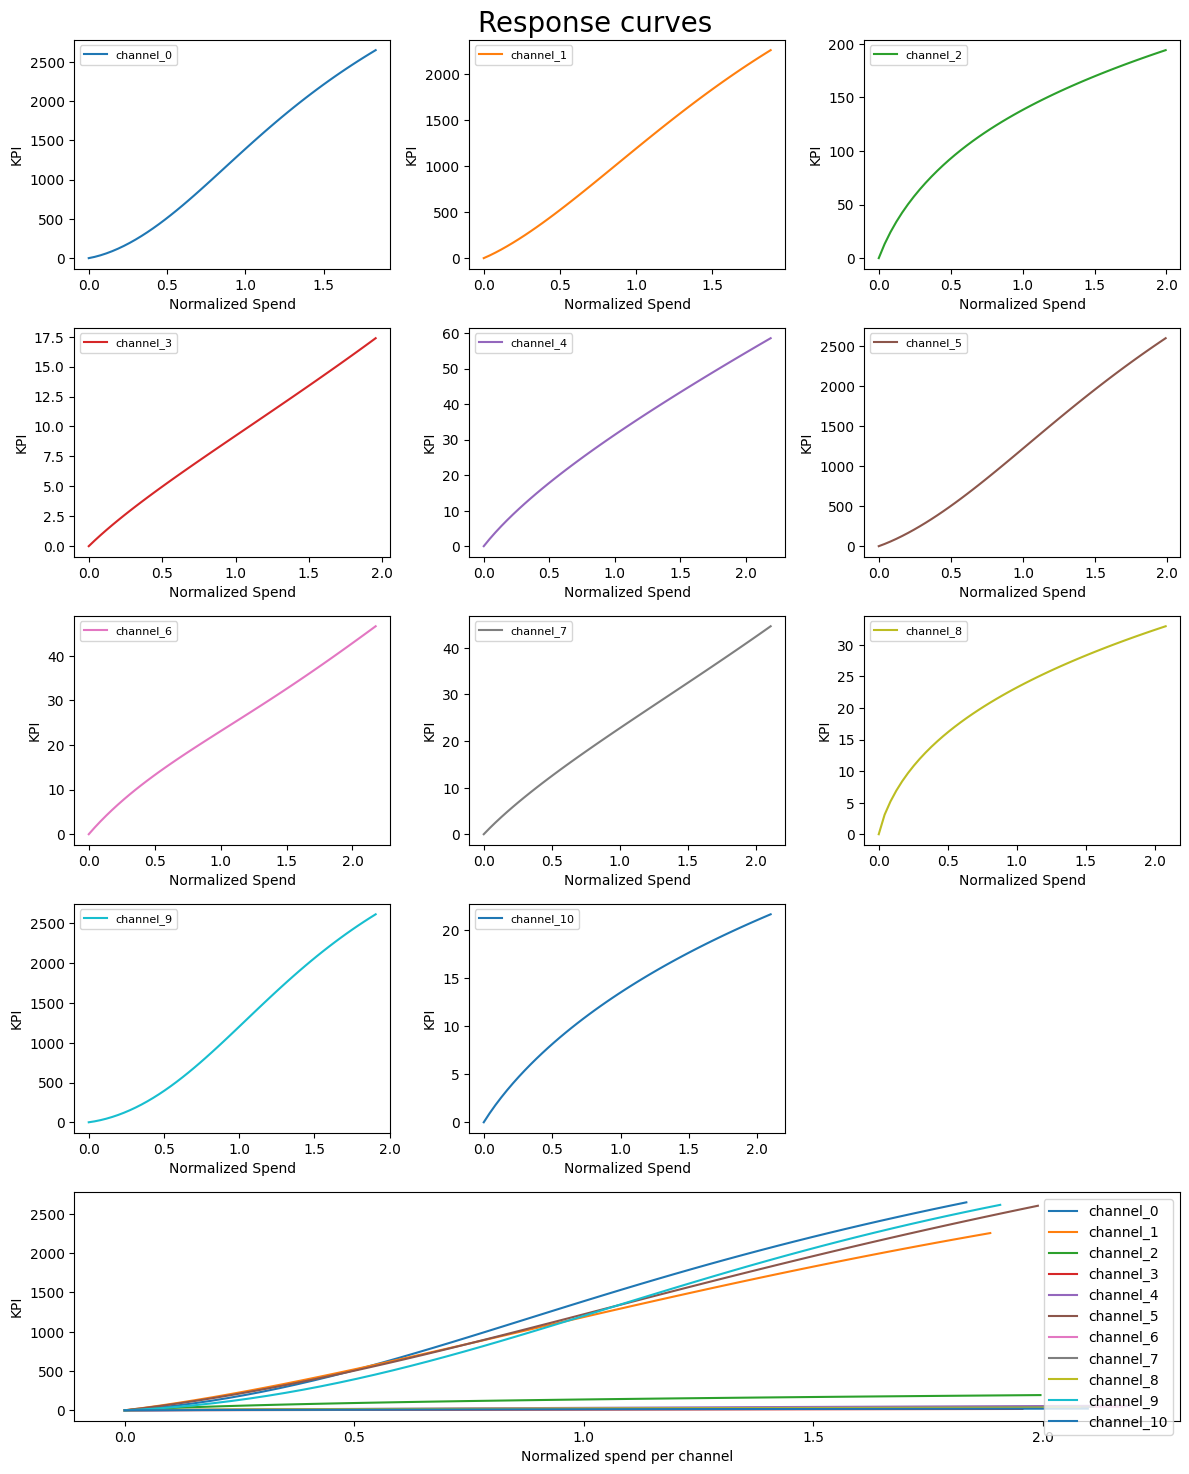

In [58]:
# Plotting response curves

figure_size = (12, 15) 
n_columns = 3 

# Call the function with updated parameters
plot.plot_response_curves(
    media_mix_model=mmm_hill_ad,
    target_scaler=target_scaler,
    figure_size=figure_size,
    n_columns=n_columns
)

## Optimization

In [62]:
prices = jnp.ones(mmm_hill_ad.n_media_channels)

In [63]:
n_time_periods = 10
budget = jnp.sum(jnp.dot(prices, marketing_sources.mean(axis=0)))* n_time_periods

In [64]:
# run optimization with the parameters of choice
solution, kpi_without_optim, previous_budget_allocation = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=mmm_hill_ad,
    budget=budget,
    prices=prices,
    media_scaler=marketing_scaler,
    target_scaler=target_scaler
)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -91102.28245441732
            Iterations: 63
            Function evaluations: 1449
            Gradient evaluations: 63


In [65]:
# Obtain optimal weekly allocation spending
optimal_budget_allocation = prices * solution.x
optimal_budget_allocation

Array([ 9194.162 ,  4542.0054, 12749.445 ,  3917.761 ,  5920.2437,
        7287.652 ,  3307.6016,  6820.338 , 11523.436 ,  2780.133 ,
        3202.5278], dtype=float32)

## Plots comparing previous budget allocation and optimized budget allocation

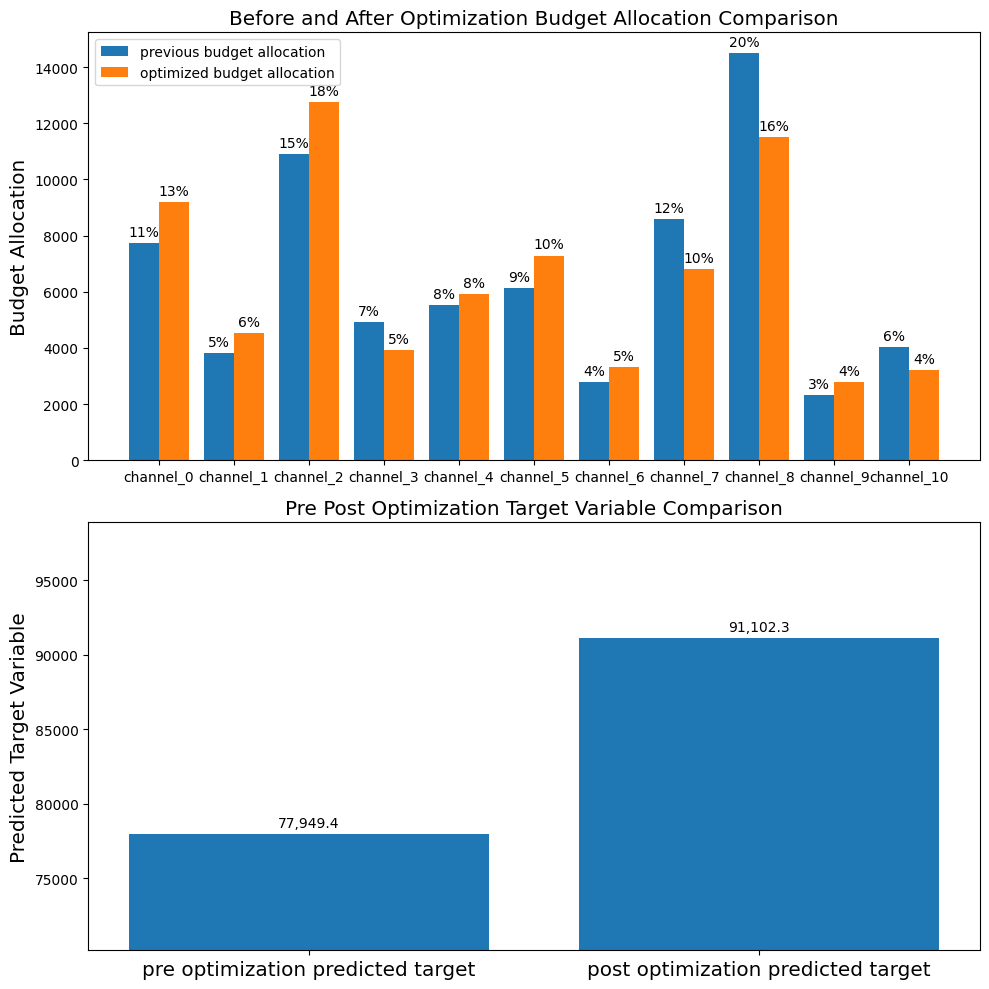

In [67]:
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm_hill_ad,
                                               kpi_with_optim=solution['fun'],
                                               kpi_without_optim=kpi_without_optim,
                                               optimal_buget_allocation=optimal_budget_allocation,
                                               previous_budget_allocation=previous_budget_allocation,
                                               figure_size = (10,10))

In [71]:
utils.save_model(media_mix_model=mmm_hill_ad, file_path= '/Users/maxwellkreitman/Desktop/Launchpad/MMM/model.pkl')